In [ ]:
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout,Input

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Machine_Learning/Crack_Detection') 
!pwd
%ls

/content/drive/MyDrive/Machine_Learning/Crack_Detection
 AEC_model.pth
 Autoencoders_Conv2d_Composites.ipynb
 Autoencoders_Conv2d.ipynb
 Crack_Detection_VGG16.ipynb
 data/
 Instance_Segmentation/
 jx_vit_base_p16_224-80ecf9dd.pth
 map_1.jpg
 map.jpg
 map_N.jpg
 Neg_00850.tif
 Pos_00045.tif
 Pos_00100.tif
 Pos_00200.tif
 Training_Loss.jpg
 Var_AEC/
 Varitional_Autoencoders_2D.ipynb
 VGG16_Accurancy.jpg
 VGG16_Training_Loss.jpg
'VGG19_Crack_Detection&Localization.ipynb'
 ViTransformers_best_model.pth
 ViTransformers.ipynb
 ViTransformers_model.pth
 Yolo_v4/


image size : (512, 512, 3)


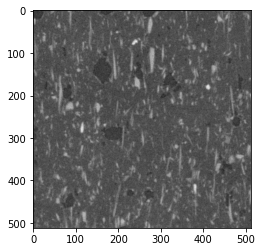

image size : (512, 512, 3)


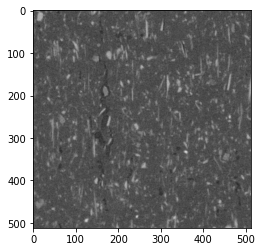

no of images in dataset: 1850


In [ ]:
root_dir = 'data/train'
folders = ['Negative','Positive']
num_files = 0
for folder in folders:
    folder_dir = os.path.join(root_dir,folder)
    files = os.listdir(folder_dir)
    num_files+=len(files)
    img = random.choice(files)
    img_dir = os.path.join(folder_dir,img)
    img = cv2.imread(img_dir)
    print("image size : {}".format(img.shape))
    plt.imshow(img)
    plt.show()
print("no of images in dataset: {}".format(num_files))

In [ ]:
data_gen = ImageDataGenerator(rotation_range=30 ,
                              horizontal_flip=True, 
                              rescale = 1/255.0,
                              validation_split=0.3)

train_generator = data_gen.flow_from_directory(root_dir,
                                              target_size = (224,224),
                                              batch_size = 64,
                                              #labels="inferred",
                                              class_mode = 'binary',
                                              color_mode = 'rgb',
                                              subset='training',
                                              shuffle=True
                                              )

valid_generator = data_gen.flow_from_directory(root_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              #labels="inferred",
                                              class_mode = 'binary',
                                              color_mode = 'rgb',
                                              subset='validation',
                                              shuffle=False
                                              )

Found 1295 images belonging to 2 classes.
Found 555 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
import pandas as pd
#import keras
#from tensorflow.keras import backend as K

def create_vgg(input_dims=(224,224,3)):
    vgg16 = VGG16(
        include_top=False, weights='imagenet', 
        input_shape=input_dims
    )
    img = Input(input_dims,dtype=tf.float32)
    x = vgg16(img)
    x = MaxPool2D((7,7))(x)
    x = Flatten()(x)
    x = Dense(1,activation='sigmoid')(x)
    model = Model(img,x)
    
    return model
    
model = create_vgg()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________

In [ ]:
model.compile(optimizer= Adam(lr=0.0001), loss = "BinaryCrossentropy", metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import time
start_time = time.time()

History = model.fit(
          train_generator,
          validation_data=valid_generator,
          epochs = 40)
"""
          callbacks=[
              tf.keras.callbacks.EarlyStopping(
                  monitor='val_loss',
                  patience=3,
                  restore_best_weights=True
              )
          ]     
"""     
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/40
21/21 [==============================] - 98s 3s/step - loss: 0.6352 - acc: 0.6556 - val_loss: 0.7636 - val_acc: 0.6757
Epoch 2/40
21/21 [==============================] - 46s 2s/step - loss: 0.5369 - acc: 0.7398 - val_loss: 0.7455 - val_acc: 0.6811
Epoch 3/40
21/21 [==============================] - 45s 2s/step - loss: 0.4580 - acc: 0.7938 - val_loss: 0.6048 - val_acc: 0.7045
Epoch 4/40
21/21 [==============================] - 45s 2s/step - loss: 0.3847 - acc: 0.8587 - val_loss: 0.6819 - val_acc: 0.6991
Epoch 5/40
21/21 [==============================] - 45s 2s/step - loss: 0.3883 - acc: 0.8471 - val_loss: 0.7391 - val_acc: 0.6757
Epoch 6/40
21/21 [==============================] - 45s 2s/step - loss: 0.4747 - acc: 0.7915 - val_loss: 0.7046 - val_acc: 0.7171
Epoch 7/40
21/21 [==============================] - 44s 2s/step - loss: 0.3363 - acc: 0.8788 - val_loss: 0.8846 - val_acc: 0.7117
Epoch 8/40
21/21 [==============================] - 44s 2s/step - loss: 0.2507 - acc: 0.91

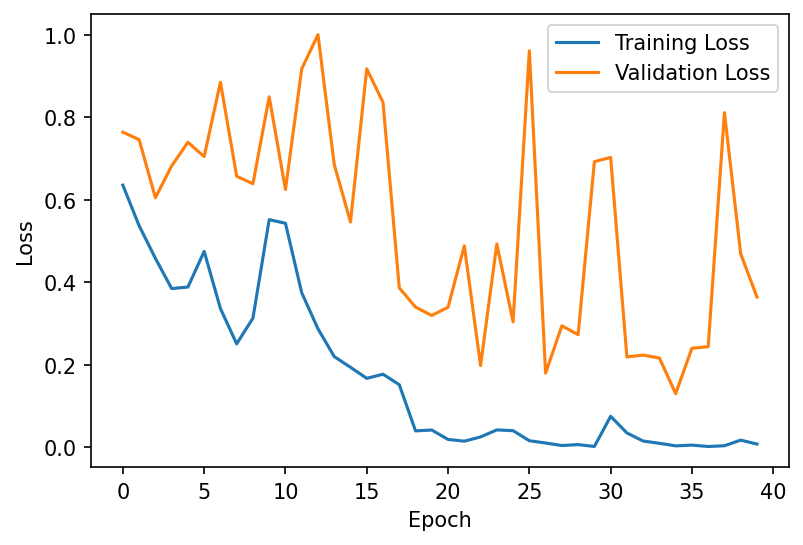

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi=150)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training Loss","Validation Loss"])
plt.show()
fig.savefig('VGG16_Training_Loss.jpg', dpi=300)

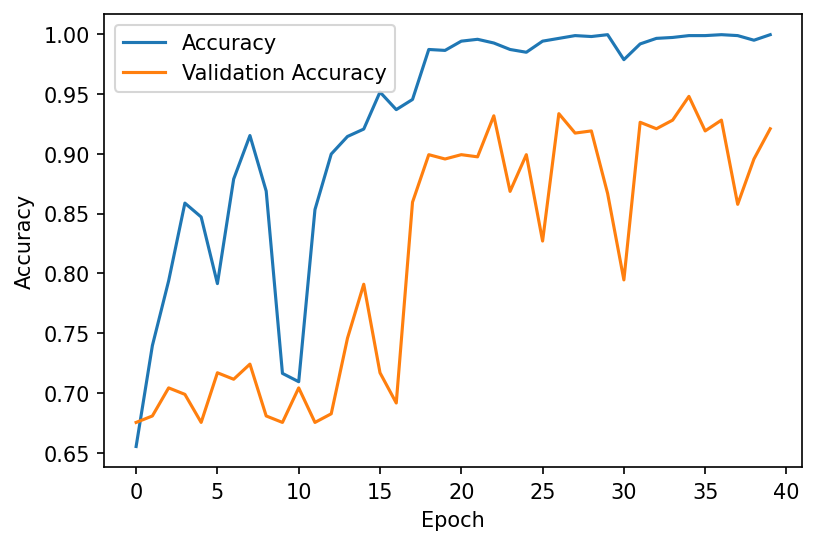

In [ ]:
fig = plt.figure(dpi=150)
plt.plot(History.history["acc"])
plt.plot(History.history['val_acc'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()
fig.savefig('VGG16_Accurancy.jpg', dpi=300)

    Test Loss: 0.33849
Test Accuracy: 92.25%


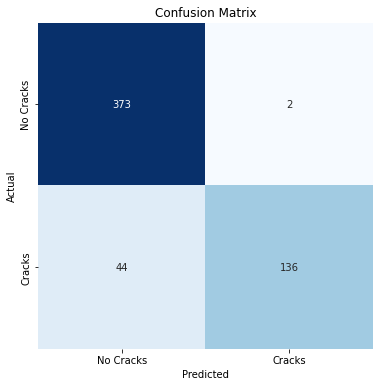

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.99      0.94       375
    POSITIVE       0.99      0.76      0.86       180

    accuracy                           0.92       555
   macro avg       0.94      0.88      0.90       555
weighted avg       0.92      0.92      0.91       555



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze((model.predict(test_data)>= 0.5).astype(np.int))# 
    
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["No Cracks", "Cracks"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["No Cracks", "Cracks"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

evaluate_model(model, valid_generator)